# Bank Customer Churn Prediction

In [56]:
# REQUIRED LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns




In [57]:
# Read the dataset

df = pd.read_csv("../data/Churn_Modelling.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
df.shape

(10000, 14)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Seem like our data types are in correct order

In [60]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

we can see there is no null values

In [61]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

We won't be needing rollnumber, customer id and surname of the customer, because it has a high cardinality impacts on system performance

In [62]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [63]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

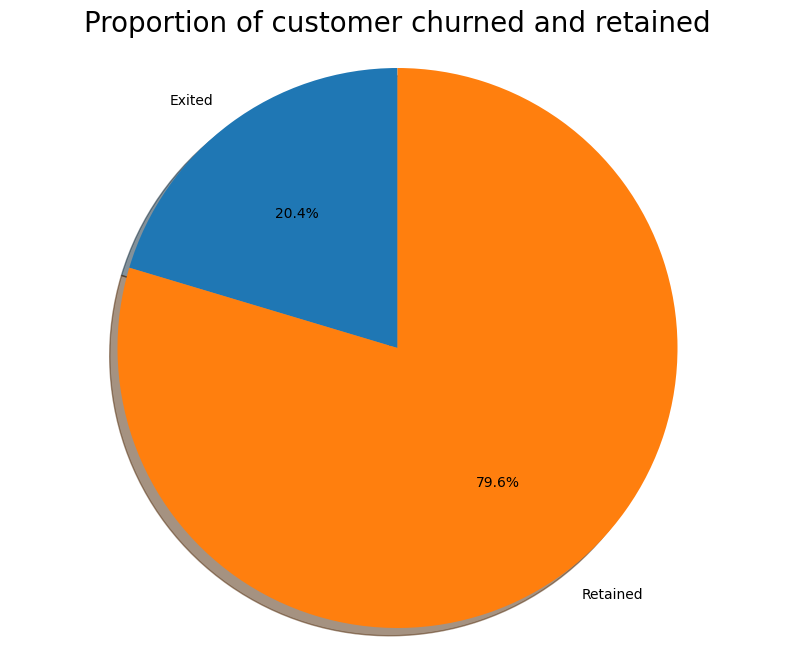

In [64]:
labels = 'Exited', 'Retained'

size = [df['Exited'].value_counts()[1], df['Exited'].value_counts()[0]] 

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.pie(size, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()



So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

In [65]:

# We first review the 'Status' relation with categorical variables
def count_plot(df, col):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Exited')
    plt.title(f"Target relation with {col}")
    

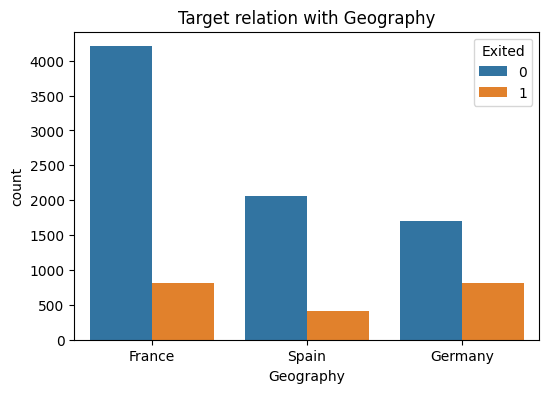

In [66]:
count_plot(df, 'Geography')

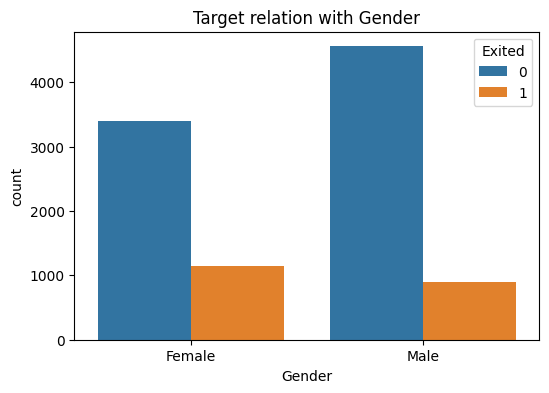

In [67]:
count_plot(df, 'Gender')

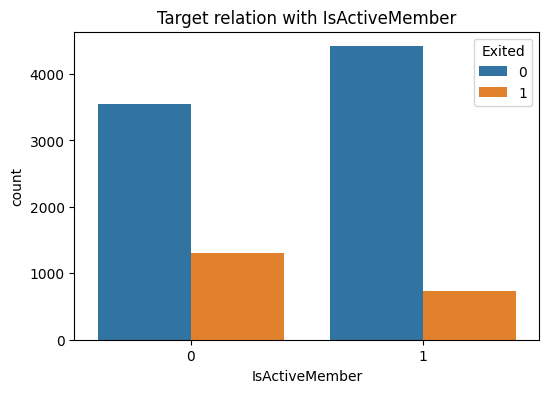

In [68]:
count_plot(df, 'IsActiveMember')



We note the following:

- Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
- The proportion of female customers churning is also greater than that of male customers
- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
- Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.



Text(0.5, 1.0, 'Relationship with creditscore')

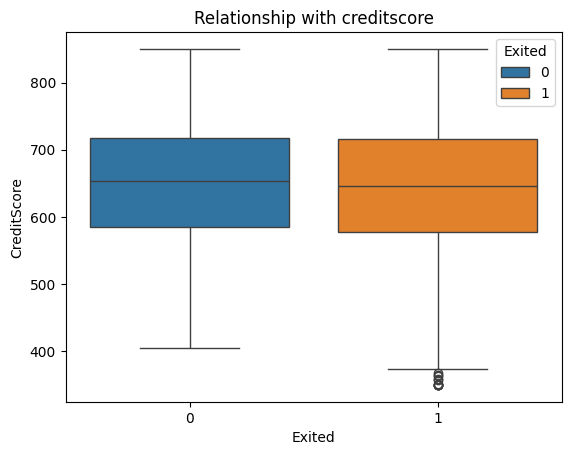

In [69]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df)
plt.title('Relationship with creditscore')

Text(0.5, 1.0, 'Relationship with Age')

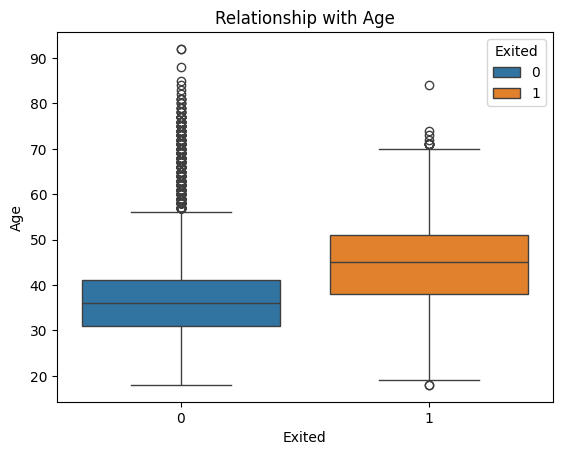

In [70]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)
plt.title('Relationship with Age')

Text(0.5, 1.0, 'Relationship with Tenure')

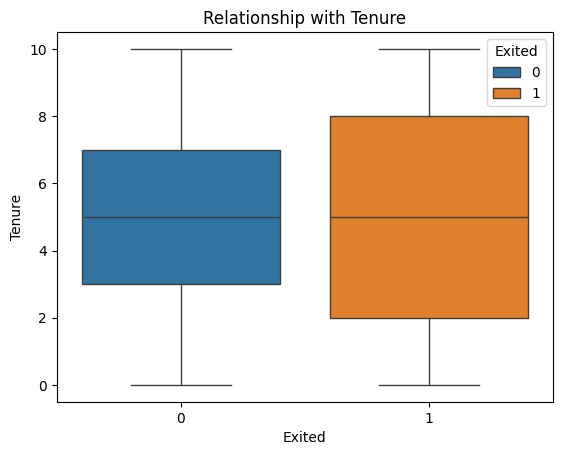

In [71]:
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df)
plt.title('Relationship with Tenure')

Text(0.5, 1.0, 'Relationship with Balance')

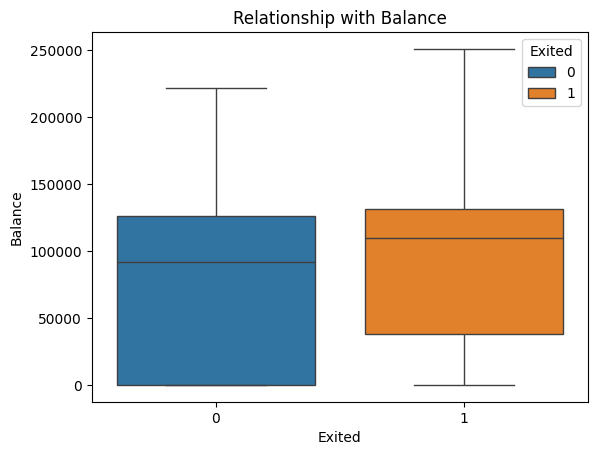

In [72]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df)
plt.title('Relationship with Balance')

## Feature engineering

We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [73]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


In [74]:
df_train['BalanceSalaryRatio'] = df_train['Balance'] / df_train['EstimatedSalary']

In [75]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741


(-1.0, 5.0)

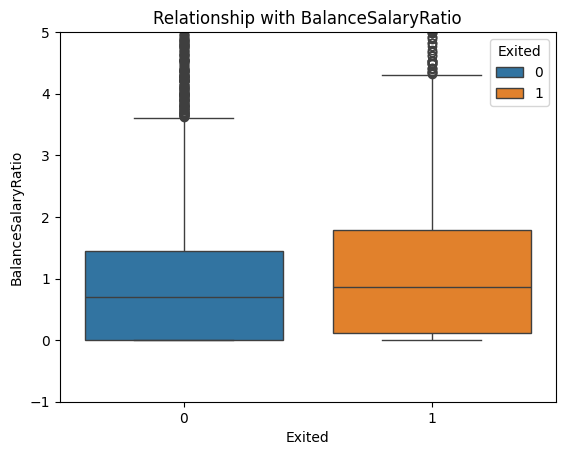

In [76]:
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.title("Relationship with BalanceSalaryRatio")
plt.ylim(-1, 5)

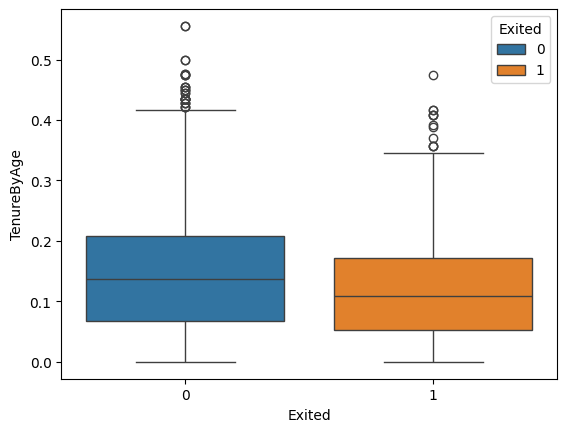

In [77]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.show()

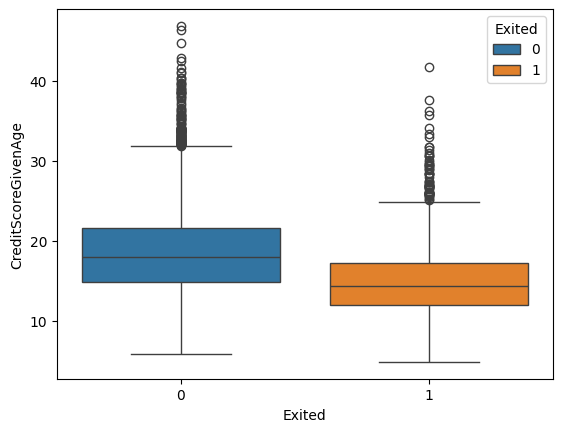

In [78]:


'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.show()

In [79]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


### 5. Data prep for model fitting


In [80]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

In [81]:
df_train = df_train[['Exited'] + continuous_vars+cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [82]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''

df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1


In [83]:
dummy = pd.get_dummies(df_train, columns=['Geography', 'Gender'])

In [84]:
dummy.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,False,False,True,True,False
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,True,False,False,True,False
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,True,False,False,True,False
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,False,True,False,False,True
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,True,False,False,False,True


In [85]:
# minMax scaling the continuous variables

minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()

df_train[continuous_vars] = (df_train[continuous_vars] - minVec) / (maxVec - minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,Spain,Female
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,France,Female
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,France,Female
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,Germany,Male
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,France,Male


In [90]:
print(dummy.head())

      Exited  CreditScore  Age  Tenure    Balance  NumOfProducts  \
8159       0          461   25       6       0.00              2   
6332       0          619   35       4   90413.12              1   
8895       0          699   40       8  122038.34              1   
5351       0          558   41       2  124227.14              1   
4314       0          638   34       5  133501.36              1   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         15306.29            0.000000     0.240000            18.440000   
6332         20555.21            4.398550     0.114286            17.685714   
8895        102085.35            1.195454     0.200000            17.475000   
5351        111184.67            1.117305     0.048780            13.609756   
4314        155643.04            0.857741     0.147059            18.764706   

      HasCrCard  IsActiveMember  Geography_France  Geography_Germany  \
8159          1               1             

In [ ]:
# l =a + '1'

NameError: name 'a' is not defined

Let's make a function to handle all the above process.

In [ ]:
def data_wrangling(df, minVec, maxVec):
    # add new feature
    df['BalanceSalaryRatio'] = df['Balance']/df['Salary']
    df['TenureByAge'] = df['Tenure'] / (df['Age'] - 18)
    df['CreditScoreByAge'] =df['CreditScore'] / (df['Age'] - 18 )

    #reorder columns

    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    
    df = df[['Predict'] + continuous_vars + cat_vars]

    # Change the 0 in categorical variables to -1
    df.loc[df['HasCrCard'] == 0, 'HashCrCard'] = -1
    df.loc[df['IsActiveMember'] == 0, 'IsActiveMember'] = -1

    # One hot encode the categorical variables
    df = pd.get_dummies(df, columns=['Gender', 'Geography'])

    df = df.dropna(columns = ['Gender', 'Geography'], inplace=True)

    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    # L = list(set(df_train_col) - set(df.columns))
    # for i in L:
    #     df[str(i)] = -1

    # MinMax scaling continuous variables based on min and max from the train data
    df[continuous_vars] = (df[continuous_vars] - minVec) / (maxVec-minVec)

    # df = df[df_train_col]

    return df
    



### 6. Model fitting and selection

For the model fitting, I will try out the following

- Logistic regression in the primal space and with different kernels
- SVM in the primal and with different Kernels
- Ensemble models



In [91]:
# Support functions

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [99]:
# Function to give best model score and parameters
def best_function(model):
    print(f'score: {model.best_score_}')
    print(f'Best Parameters are : {model.best_params_}')
    print(f'Best Estimator are: {model.best_estimator_}')


def get_auc_score(y_actual, method, mth2):
    auc_score = roc_auc_score(y_actual, method)
    fpr_df, tpr_df, _ = roc_curve(y_actual, mth2)

    return auc_score, fpr_df, tpr_df



In [93]:
# Fit primal logistic regression

param_grid = {
    'C': [0.1, 0.5, 1, 10, 50, 100],
    'max_iter': [250],
    'fit_intercept': [True],
    'intercept_scaling': [1],
    'penalty': ['l2'],
    'tol': [0.00001, 0.0001, 0.000001]
}

log_param_grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid=param_grid, cv = 5, verbose=0)



In [94]:
# fit the model
log_param_grid.fit(dummy.loc[:, dummy.columns != 'Exited'], dummy['Exited'])

/home/jagannath/DS_Projects/ds_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jagannath/DS_Projects/ds_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'max_iter': [250], 'penalty': ['l2'],
                         'tol': [1e-05, 0.0001, 1e-06]})

In [95]:
best_function(log_param_grid)

0.813625
{'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.5, max_iter=250, tol=1e-05)


In [96]:
# Fit logistic regression with degree 2 polynomial kernel

grid = {
    'C': [0.1, 10, 50],
    'max_iter': [300, 500],
    'fit_intercept': [True],
    'intercept_scaling': [1],
    'penalty': ['l2'],
    'tol': [0.0001, 0.000001]
}

poly = PolynomialFeatures(degree=2)

poly_fit = poly.fit_transform(dummy.loc[:, dummy.columns != 'Exited'])

In [97]:
poly_grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=grid, cv=5, refit=True, verbose=0)

poly_grid.fit(poly_fit, dummy['Exited'])

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 10, 50], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'max_iter': [300, 500],
                         'penalty': ['l2'], 'tol': [0.0001, 1e-06]})

In [100]:
best_function(poly_grid)

score: 0.811125
Best Parameters are : {'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
Best Estimator are: LogisticRegression(C=50, max_iter=300, solver='liblinear', tol=1e-06)


It accuracy score is slightly lower than above

In [101]:
# Fit SVM with RBF Kernel

param_grid = {'C': [0.5,100,150], 
              'gamma': [0.1,0.01,0.001],
              'probability':[True],
              'kernel': ['rbf']}

SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)

In [102]:
SVM_grid.fit(dummy.loc[:, dummy.columns != 'Exited'],dummy.Exited)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.5, 100, 150], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf'], 'probability': [True]})

In [103]:
best_function(SVM_grid)

score: 0.7941249935656017
Best Parameters are : {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Best Estimator are: SVC(C=0.5, gamma=0.1, probability=True)


In [104]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)


In [105]:
RanFor_grid.fit(dummy.loc[:, dummy.columns != 'Exited'],dummy.Exited)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'max_features': [2, 4, 6, 7, 8, 9],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [50, 100]})

In [106]:
best_function(RanFor_grid)

score: 0.8644999999999999
Best Parameters are : {'max_depth': 8, 'max_features': 7, 'min_samples_split': 3, 'n_estimators': 50}
Best Estimator are: RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=3,
                       n_estimators=50)


In [107]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, verbose=0)



In [108]:

xgb_grid.fit(dummy.loc[:, dummy.columns != 'Exited'],dummy.Exited)



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0.01, 0.001, 0.001],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [5, 10, 20, 100]})

In [109]:
best_function(xgb_grid)

score: 0.8627500000000001
Best Parameters are : {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
Best Estimator are: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.01, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


Review best model fit accuracy : Keen interest is on the performance in predicting 1's (Customers who churn)

In [110]:


print(classification_report(dummy.Exited, log_param_grid.predict(dummy.loc[:, dummy.columns != 'Exited'])))



              precision    recall  f1-score   support

           0       0.81      0.99      0.89      6353
           1       0.69      0.11      0.19      1647

    accuracy                           0.81      8000
   macro avg       0.75      0.55      0.54      8000
weighted avg       0.78      0.81      0.74      8000



In [112]:
print(classification_report(dummy.Exited,  poly_grid.predict(poly_fit)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.63      0.22      0.33      1647

    accuracy                           0.81      8000
   macro avg       0.73      0.59      0.61      8000
weighted avg       0.79      0.81      0.77      8000

